In [1]:
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv('spam_Emails_data.csv')
df.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [3]:
df['label']=df['label'].map({'Ham':0,'Spam':1})

In [4]:
df.head(20)

,label,text
0,1,viiiiiiagraaaa\nonly for the ones that want to...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...
3,1,start increasing your odds of success & live s...
4,0,author jra date escapenumber escapenumber esca...
5,1,img src escapenumberd http loan co kr img emai...
6,0,attached is the weekly deal report from 10 / 1...
7,0,this is the version that we created earlier th...
8,0,pulp writing printing paper escapenumber escap...
9,0,stefan metze metzmacher writes stefan metze m...


In [5]:
stop_words=set(stopwords.words('english'))

In [6]:
df['text'] = df['text'].astype(str)

# Apply the text processing function
df['text'] = df['text'].apply(lambda x: ' '.join(
    term for term in nltk.word_tokenize(x.lower())
    if term not in stop_words and term.isalpha()
))

In [7]:
count_vectorizer=CountVectorizer()
x=count_vectorizer.fit_transform(df['text'])
y=df['label']

In [8]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [9]:
model=MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [10]:
predictions=model.predict(x_test)
print('Accuracy: ',accuracy_score(y_test, predictions))
print('Confusion Matrix: \n',confusion_matrix(y_test, predictions))

Accuracy:  0.9648015681958869
Confusion Matrix: 
 [[30229   532]
 [ 1515 25880]]


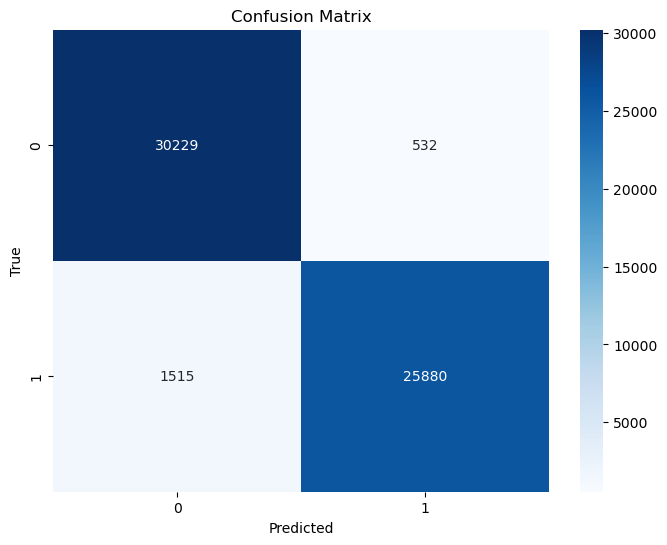

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

cm=confusion_matrix(y_test, predictions)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Function to test user input
def test_user_input(input_message):
    # Preprocess user input
    processed_input = ' '.join(term for term in nltk.word_tokenize(input_message.lower())
                               if term not in stop_words and term.isalpha())
    
    # Vectorize user input
    input_vector = count_vectorizer.transform([processed_input])
    
    # Predict using the model
    prediction = model.predict(input_vector)
    
    # Print predicted result
    print(f"Input message: {input_message}")
    print(f"Predicted label: {prediction[0]}")

# Test with user input
test_user_input("Congratulations! You've won a free trip to Hawaii. Click here to claim your prize.")
test_user_input("Hey, are we still meeting for lunch today?")


Input message: Congratulations! You've won a free trip to Hawaii. Click here to claim your prize.
Predicted label: 1
Input message: Hey, are we still meeting for lunch today?
Predicted label: 0


In [13]:
# Save the vectorizer
import pickle
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(count_vectorizer, vectorizer_file)

# Save the model
with open('spam_classifier.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

In [15]:
# 2. Support Vector Machine (SVM)
tfidf_vectorizer = TfidfVectorizer()
x_tfidf = tfidf_vectorizer.fit_transform(df['text'])
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

In [16]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_tfidf, y_train_tfidf)
svm_predictions = svm_model.predict(x_test_tfidf)

print("\nSupport Vector Machine (SVM)")
print("Accuracy:", accuracy_score(y_test_tfidf, svm_predictions))
print("Classification Report:\n", classification_report(y_test_tfidf, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test_tfidf, svm_predictions))


Support Vector Machine (SVM)
Accuracy: 0.9875164427020195
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     20467
           1       0.98      0.99      0.99     18304

    accuracy                           0.99     38771
   macro avg       0.99      0.99      0.99     38771
weighted avg       0.99      0.99      0.99     38771

Confusion Matrix:
 [[20166   301]
 [  183 18121]]


In [17]:
# 3. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)

print("\nRandom Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))


Random Forest Classifier
Accuracy: 0.9802771855010661
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     30761
           1       0.99      0.97      0.98     27395

    accuracy                           0.98     58156
   macro avg       0.98      0.98      0.98     58156
weighted avg       0.98      0.98      0.98     58156

Confusion Matrix:
 [[30524   237]
 [  910 26485]]


In [18]:
# Save the vectorizer
import pickle
# Save the model
with open('spam_classifier_SVC.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)
with open('spam_classifier_RandomForestClassifier.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model with some hyperparameters
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Fit the model
xgb_model.fit(x_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(x_test)

# Evaluate the model
print("\nXGBoost Classifier")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))


/home/ramachandra/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [01:52:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classifier
Accuracy: 0.9326810647224706
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93     30761
           1       0.90      0.97      0.93     27395

    accuracy                           0.93     58156
   macro avg       0.93      0.93      0.93     58156
weighted avg       0.94      0.93      0.93     58156

Confusion Matrix:
 [[27685  3076]
 [  839 26556]]


In [21]:
# Save the model
with open('spam_classifier_XGBClassifier.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

In [23]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model with some hyperparameters
lgbm_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=20,
    random_state=42
)

# Fit the model
lgbm_model.fit(x_train, y_train)

# Make predictions
lgbm_predictions = lgbm_model.predict(x_test)

# Evaluate the model
print("\nLightGBM Classifier")
print("Accuracy:", accuracy_score(y_test, lgbm_predictions))
print("Classification Report:\n", classification_report(y_test, lgbm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, lgbm_predictions))


TypeError: Expected np.float32 or np.float64, met type(int64)

In [ ]:
# Save the model
with open('spam_classifier_LGBMClassifier.pkl', 'wb') as model_file:
    pickle.dump(lgbm_model, model_file)